#5. Scikit-Learn (`sklearn`)

오늘은 Scikit-Learn (sklearn) 패키지를 사용하여 모델 학습과 테스트를 진행합니다.

##5.1. Random Forest - Ensemble of Decision Trees

먼저 필요한 라이브러리들을 불러옵니다. 오늘 사용할 라이브러리들이 다음의 code snippet에 기술되어 있습니다.

Scikit-Learn (sklearn) 패키지에는 ML 공부를 할 때 자주 사용되는 데이터셋들도 포함이 되어 있습니다. 그러한 데이터셋 중 Iris라는 데이터셋을 사용해보겠습니다. 이는 iris 꽃잎의 체적에 관한 정보에 근거하여 꽃의 품종을 결정하고자하는 데이터셋입니다.

> Attribute Information:
> 1. sepal length in cm 
> 2. sepal width in cm 
> 3. petal length in cm 
> 4. petal width in cm 
> 5. class: {Setosa, Versicolour, Virginica}

<img src="https://d31ezp3r8jwmks.cloudfront.net/variants/2dzeX71EceP88fenXxy1uj1t/d2e337a4f6900f8d0798c596eb0607a8e0c2fbddb6a7ab7afcd60009c119d4c7" width="500">


<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width="500">



In [1]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


# Classification metrics
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, log_loss)

# Load the Iris dataset
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

list(zip(X[:5],y[:5])) # show first 5 instances


[(array([5.1, 3.5, 1.4, 0.2]), 0),
 (array([4.9, 3. , 1.4, 0.2]), 0),
 (array([4.7, 3.2, 1.3, 0.2]), 0),
 (array([4.6, 3.1, 1.5, 0.2]), 0),
 (array([5. , 3.6, 1.4, 0.2]), 0)]

이제 수업을 통해 이야기 나눈 절차에 따라 sklearn을 사용해보겠습니다.

#### Step 1 - Separating training and testing datasets
첫 단계로 학습된 모델의 정확한 검증을 위해 데이터셋을 training set과 testing set으로 분리를 합니다.

In [2]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=777)

#### Steps 2 & 3 - Optimize hyperparameters via cross validation
먼저 시도해볼 모델은 Random Forest 입니다. `GridSearchCV`를 사용하여 학습에 사용될 hyperparameters를 찾습니다. `GridSearchCV`의 `fit()` 함수를 사용하면, Hyperparameter 탐색과 학습 과정이 모두 수행됩니다. 다음 code snippet을 수행하고 나면, `best_clf`에 최종적으로 학습된 모델이 저장됩니다.

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a model object
clf = RandomForestClassifier()

# Set a serach range
parameters = {'n_estimators': [100, 150, 200],
              'criterion': ['gini', 'entropy']}
# Find the best hyperparameters using GridSearchCV
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)
gridsearch.fit(X_tr, y_tr)

# Show the best hyperparameters
# String starts with 'f' - print out a floating point number in the string

print(f'gridsearch.best_params_ = {gridsearch.best_params_}') 

# The best model is stored in 'best_clf'
best_clf = gridsearch.best_estimator_
best_clf

gridsearch.best_params_ = {'criterion': 'gini', 'n_estimators': 100}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

####Step 4 - Model performance
얻어진 모델을 앞서 떼어두었던 테스트 데이터셋에 적용해봅니다. `predict()` 함수를 통해 예측이 이루어지며, `accuracy_score()` 함수를 사용하면 쉽게 정확도를 계산해볼 수 있습니다.


In [4]:
y_pred = best_clf.predict(X_ts)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')


test_acc = 0.9333333333333333


####Step 5 - Train final model on full dataset (optional step)
선택적으로 train data와 test data를 모두 고려하여, 최종 배포용 모델을 다시 학습할 수 있습니다. 이 때, 앞서 탐색을 통해 찾은 hyperparameters를 다시 사용하면 됩니다.

In [5]:
final_model = RandomForestClassifier(**gridsearch.best_params_)
final_model.fit(X, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##5.2. Logistic Regression (LogReg)

이번 절에서는 Scikit-Learn (sklearn)에 포함되어있는 logistic regression 모듈을 사용하여, iris 데이터셋 학습을 진행해보겠습니다.

Logisitc regression을 사용할 때, input features는 모두 같은 scale을 갖도록 해주어야 합니다. `sklearn.preprocessing.MinMaxScaler`를 사용하면, 손쉽게 normalization을 진행할 수 있습니다.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# (Re-)Load a dataset
X, y = load_iris(return_X_y=True)

# Step 1: Get training and testing datasets
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=777)

# Data normalization
normalizer = MinMaxScaler(feature_range=(0, 1))
normalizer.fit(X_tr)
X_tr_normalized = normalizer.transform(X_tr)
X_ts_normalized = normalizer.transform(X_ts)

# Show first 5 instances
print('Before normalization:\n', X_tr[:5])
print('After normalization:\n', X_tr_normalized[:5])

Before normalization:
 [[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [4.6 3.1 1.5 0.2]
 [4.8 3.1 1.6 0.2]
 [4.5 2.3 1.3 0.3]]
After normalization:
 [[0.34375    0.16666667 0.46296296 0.375     ]
 [0.59375    0.33333333 0.72222222 0.58333333]
 [0.0625     0.45833333 0.05555556 0.04166667]
 [0.125      0.45833333 0.07407407 0.04166667]
 [0.03125    0.125      0.01851852 0.08333333]]


이제 학습과 테스트를 진행해봅니다.

In [7]:
# Step 2: Use GridSearchCV to find optimal hyperparameter values
clf = LogisticRegression(max_iter=5000)
parameters = {'penalty': ['l2'],
              'C': [10e-5, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e5]}
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)
gridsearch.fit(X_tr_normalized, y_tr)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# Step 3: Get model with best hyperparameters
best_clf = gridsearch.best_estimator_

# Step 4: Get best model performance from testing set
y_pred = best_clf.predict(X_ts_normalized)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')


gridsearch.best_params_ = {'C': 100.0, 'penalty': 'l2'}
test_acc = 0.9833333333333333


##5.3. Benchmark
이번 절에서는 조금 복잡한 데이터셋을 생성하여 random forest와 logistic regression 모델에 각각 적용해보고, 예측 결과를 비교해보고자 합니다. 우리는 sklearn에 내장된 모듈을 사용하여 non-linear decision boundary를 갖는 데이터셋을 생성해보고, 이 데이터셋에 대하여 각 모델의 예측 정확도가 어떻게 되는지 비교해보고자 합니다.

####Dataset

`make_circles` 모듈을 사용하여 1,000개의 data instances를 생성합니다. 이어지는 코드는 `matplotlib`으로 생성된 데이터셋을 시각화하여 줍니다.

Text(0, 0.5, '$x_2$')

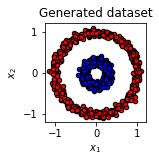

In [8]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate a dataset
X, y = make_circles(n_samples=1000, factor=.3, noise=.05)

# Show the dataset
plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Generated dataset")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


#### LogReg

먼저 logistic regression을 적용해봅니다. 위에서와 동일한 구조의 코드를 사용합니다.

In [9]:
# Step 1: Get training and testing datasets
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=777)

# Data normalization
normalizer = MinMaxScaler(feature_range=(0, 1))
normalizer.fit(X_tr)
X_tr_normalized = normalizer.transform(X_tr)
X_ts_normalized = normalizer.transform(X_ts)


# Step 2: Use GridSearchCV to find optimal hyperparameter values
clf = LogisticRegression(max_iter=5000)
parameters = {'penalty': ['l2'],
              'C': [10e-5, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e5]}
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)
gridsearch.fit(X_tr_normalized, y_tr)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# Step 3: Get model with best hyperparameters
best_clf = gridsearch.best_estimator_

# Step 4: Get best model performance from testing set
y_pred = best_clf.predict(X_ts_normalized)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')

gridsearch.best_params_ = {'C': 0.0001, 'penalty': 'l2'}
test_acc = 0.4825


####DT

이번엔 Sklearn을 사용한 decision tree입니다.

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Step 2: Use GridSearchCV to find optimal hyperparameter values
clf = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy']}
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)
gridsearch.fit(X_tr, y_tr)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# Step 3: Get model with best hyperparameters
best_clf = gridsearch.best_estimator_

# Step 4: Get best model performance from testing set
y_pred = best_clf.predict(X_ts)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')

gridsearch.best_params_ = {'criterion': 'gini'}
test_acc = 0.9925


####RF

마지막으로 Sklearn을 사용한 random forest입니다.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Step 2: Use GridSearchCV to find optimal hyperparameter values
clf = RandomForestClassifier()
parameters = {'n_estimators': [50, 100, 150, 200],
              'criterion': ['gini', 'entropy']}
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)

gridsearch.fit(X_tr, y_tr)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# Step 3: Get model with best hyperparameters
best_clf = gridsearch.best_estimator_

# Step 4: Get best model performance from testing set
y_pred = best_clf.predict(X_ts)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')

gridsearch.best_params_ = {'criterion': 'gini', 'n_estimators': 50}
test_acc = 0.9925


**Q: 세 모델의 예측 성능이 각각 어떻게 나타나나요? 주어진 데이터셋에 대하여, logistic regression, decision tree, random forest 중 어떤 모델이 더 적합할까요? 우리의 논의를 바탕으로, 이러한 성능 차이를 설명할 수 있나요?**

#### References
* James Bourbeau. *Supervised machine learning in Python 
with scikit-learn*. URL: https://jrbourbeau.github.io/madpy-ml-sklearn-2018/#/
* Joaquin Vanschoren. *Machine Learning with Scikit-Learn*. URL: http://joaquinvanschoren.github.io/ML-course-R/TutorialSKlearn.slides.html#/
* User Guide - scikit-learn. URL: https://scikit-learn.org/stable/user_guide.html